<a href="https://colab.research.google.com/github/zhrkhirnsa/UAS-Analitika-Data_Zahra-Khairunnisa_3333210040_Kelas-D/blob/main/Mini_Project_UAS_Andat_Zahra_Khairunnisa_3333210040.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Zahra Khairunnisa**

**NIM: 3333210040**

**Kelas: D**

**Dataset: Amazon Stock Price**

**Time Series**

Time Series adalah rangkaian data yang dikumpulkan dalam urutan waktu yang biasanya digunakan untuk memprediksi atau meramalkan masa depan berdasarkan data yang telah diamati sebelumnya.

Aplikasi Time Series dalam kehidupan sehari-hari contohnya seperti pada statistik, perkiraan cuaca, prediksi harga saham, prediksi gempa bumi, dan lainnya. Data time series dapat dianalisis untuk mengidentifikasi pola, tren, musiman, dan fluktuasi lainnya yang dapat membantu dalam pengambilan keputusan, peramalan, dan pemodelan.

**Forecasting**

Forecasting atau peramalan masih berkaitan dengan Time Series. Jika Time Series adalah datanya, sedangkan forecasting adalah prosesnya, yaitu proses untuk memprediksi masa depan menggunakan data time series tersebut.

Dalam melakukan peramalan time series, dapat dilakukan beberapa metode diantaranya moving average, exponential smoothing, ARIMA, MAPE, MAE, dan lainnya. Dari semua metode tersebut, nantinya akan dipilih metode dengan nilai eror terkecil untuk selanjutnya dijadikan acuan untuk memprediksi suatu data time series.


**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Library di atas merupakan library yang akan digunakan dalam proses forecasting kali ini.

1.   Pandas adalah library python yang digunakan untuk manipulasi dan analisis data.
2.    NumPy (Numerical python) adalah library python yang digunakan untuk komputasi numerik.
3. Matplotlib adalah suatu library plotting dalam python, sedangkan pyplot adalah modul dalam matplotlib untuk membuat grafik dan visualisasi data. Dengan pyplot, kita dapat membuat berbagai jenis grafik seperti garis, scatter, bar, histogram, dan lainnya.
4. Seaborn adalah library python untuk membuat visualisasi statistik yang menarik seperti plot distribusi, heatmap, pair plot, dan lainnya.
5. Math adalah library standar python yang menyediakan fungsi matematika dasar seperti fungsi trigonometri, eksponensial, logaritma, dan lainnya.
6. Datetime adalah library yang digunakan untuk bekerja dengan tanggal dan waktu untuk memanipulasi, memformat, dan melakukan operasi pada tanggal, waktu, dan interval waktu.
7. "matplotlib inline" adalah suatu perintah untuk melihat dan berinteraksi dengan visualisasi tanpa perlu mengakses jendela plot terpisah.



**Import Dataset**

Sumber Dataset yang saya gunakan : https://www.kaggle.com/datasets/kannan1314/amazon-stock-price-all-time?resource=download

In [ ]:
# https://drive.google.com/file/d/1DRYXpZLOxr2b8pyk4p9ytJ7az_X5lEys/view?usp=drive_link

!gdown 1DRYXpZLOxr2b8pyk4p9ytJ7az_X5lEys

Downloading...
From: https://drive.google.com/uc?id=1DRYXpZLOxr2b8pyk4p9ytJ7az_X5lEys
To: /content/Amazon.csv
100% 444k/444k [00:00<00:00, 119MB/s]


Masukkan file csv dataset yang telah didownload dari website kaggle dan telah diupload pada google drive. Pada kali ini, saya menggunakan dataset Amazon Stock Price All Time (harga saham Amazon) dari tanggal 15 Mei 1997 sampai 21 Oktober 2021.

In [ ]:
train_data = pd.read_csv('Amazon.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


Dataset yang telah diupload selanjutnya dibaca dan diberi nama dengan variabel "train_data". Codingan 'train_data.head()' digunakan untuk menampilkan 5 baris pertama dari data yang dilampirkan.

Pada data ini terdapat kolom 'date' dimana berisi periode tanggal harga saham Amazon yang diamati, yaitu dari 15 Mei 1997 sampai 21 Oktober 2021. Kolom 'Open' berisi harga pembukaan saham, 'high' berisi harga tertinggi saham, 'low' berisi harga terendah saham, 'close' berisi harga penutupan saham di hari tersebut, 'adj close' berisi hampir sama dengan 'close' tetapi nilainya lebih akurat, dan 'volume' berisi jumlah lembar saham yang ditransaksikan dalam hari tersebut.

Check missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


Selanjutnya, kita cek apakah data sudah bersih dari missing value. Dan ternyata data sudah bersih dari missing value yang dapat dilihat dari panjang semua kolom data yang sama yaitu 6155.

Check statistic vales for every features

In [ ]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03
mean,520.556302,526.216132,514.277282,520.429832,520.429832,7.329010e+06
std,857.161696,865.821041,847.270905,856.668492,856.668492,7.149521e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.750000,39.514999,38.104999,38.821251,38.821251,3.579350e+06
50%,92.669998,94.190002,90.750000,92.639999,92.639999,5.470000e+06
75%,528.949982,535.304993,521.950012,529.450012,529.450012,8.294950e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


Selanjutnya, di atas merupakan hasil dari statistical featurenya yaitu dari nilai mean, median, minimum, dan maksimumnya.

Handle datetime data for time series

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


Selanjutnya, kita jadikan kolom 'Date' menjadi tipe data datetime untuk menjadi acuan saat data di training.

Kolom 'Date' juga dijadikan sebagai index supaya tidak termasuk dalam fitur utama sehingga nantinya kita dengan mudah mengakses dan merujuk baris berdasarkan tanggal tertentu dalam dataset tersebut.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

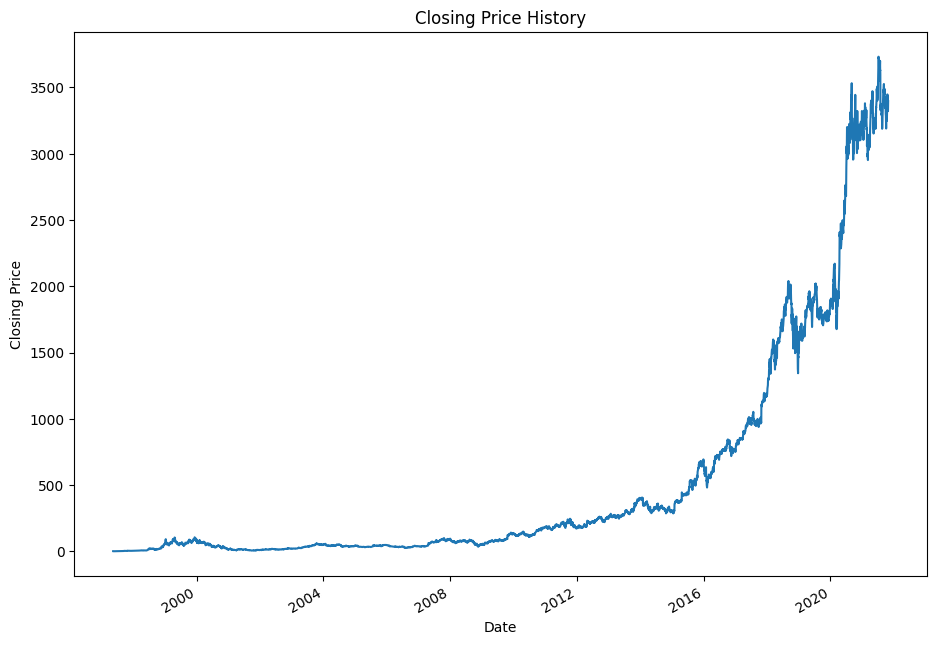

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Setelah menjadikan kolom 'Date' sebagai index, kita lihat gambar visualisasi data closing price "Adj Close" atau harga penutupan pasar pada saham Amazon dari tahun 1997-2021 setiap harinya.

Kita dapat melihat pada gambar di atas bahwa harga saham Amazon mengalami kenaikan seiring berjalannya waktu, hal tersebut juga menandakan bahwa datanya mengalami trend naik.

<Figure size 1600x800 with 0 Axes>

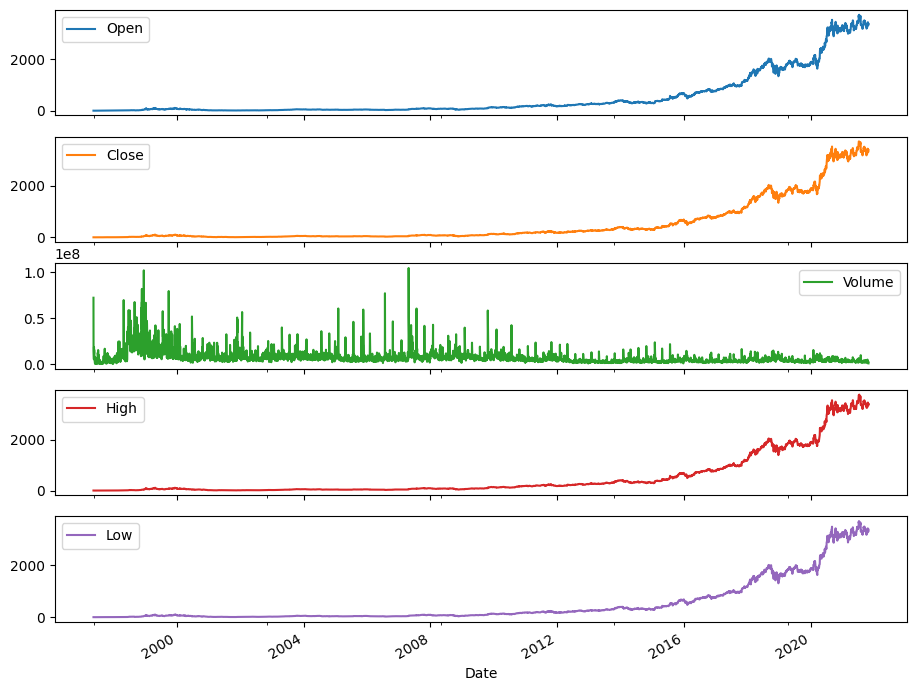

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Setelah itu, kita juga ingin melihat pergerakan data dari kolom lain yaitu dari kolom 'Open', 'Close', 'Volume', 'High', dan 'Low'.

Pada harga pembukaan (Open), harga penutupan (Close), harga tertinggi (High), dan harga terendah (Low) terlihat datanya trend naik karena grafiknya bergerak semakin naik. Sedangkan pada jumlah transaksi saham (Volume) terlihat datanya stasioner (naik turun) karena orang-orang yang membeli saham cenderung sama.

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Selanjutnya, kita membuat fitur baru untuk nantinya dimasukkan ke dalam dataset kita.

Fitur pertama diberi nama "train_data['HL_PCT']" dimana berisi persentase perubahan harian antara harga tertinggi dan harga terendah yaitu harga tertinggi saham dikurang harga terendah saham lalu dibagi data terendah saham dan dikali 100.


Lalu fitur kedua diberi nama "train_data['PCT_change']" dimana berisi persentase perubahan harian antara harga penutupan dan harga pembukaan yaitu harga penutupan saham dikurang harga pembukaan saham lalu dibagi harga pembukaan saham dan dikali 100.

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Kita masukkan fitur baru data frame "df" yang berisi kolom-kolom 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume' ke dalam dataset kita.

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

308


<ipython-input-19-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Pada variabel 'forecast_out' digunakan untuk menghitung jumlah baris data yang akan diprediksi berdasarkan persentase 5% atau 0,05 dari keseluruhan dataset.

Lalu, kita jadikan harga penutupan saham 'Adj Close' sebagai labelnya karena memang harga penutupan saham tersebut yang menentukan harga saham pada suatu hari tertentu.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Selain library yang telah di import sebelumnya, disini kita juga import beberapa fungsi dari library sklearn untuk melakukan forecast (peramalan).

1. StandardScaler digunakan untuk melakukan penskalaan fitur.
2. LinearRegression dan Ridge digunakan untuk melakukan prediksi berdasarkan hubungan linear antara fitur dan target.
3. RandomForestRegressor adalah kumpulan pohon keputusan (decision tree) untuk melakukan prediksi.
4. SVR adalah model regresi yang menggunakan metode Support Vector Machines (SVM) untuk melakukan prediksi.
5. train_test_split digunakan untuk membagi dataset menjadi subset train dan test, yang akan digunakan untuk melatih dan mengevaluasi model.
6. mean_squared_log_error digunakan untuk mengukur kesalahan atau error prediksi pada data.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-21-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Disini kita lakukan normalisasi data karena interval harga sahamnya dinilai cukup jauh seperti ada harga yang dari ratusan hingga ribuan.

Normalisasi data menggunakan scaler supaya range datanya tidak terlalu jauh sehingga ketika di masukkan ke machine learning model tidak membutuhkan waktu terlalu lama untuk training nya dan juga dapat mengurangi bias.

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Disini selanjutnya kita lakukan slicing dimana di atas terdapat data inputan x adalah dari variabel forecast_out yang telah ditentukan pada codingan sebelumnya.

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-22-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Untuk data inputan y kita pilih dari 'label' yang telah ditentukan sebelumnya yaitu 'Adj Close' atau harga saham penutupan.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selanjutnya kita lakukan splitting dataset untuk train dan test datanya. Disini kita gunakan 'test_size' sebesar 0,2 yang berarti 20% dari data akan digunakan sebagai subset test, sedangkan 80% akan digunakan sebagai subset train.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Untuk model pertama, kita gunakan model linear regression atau regresi linear.

'lr.score' (Linearregression.score) kita gunakan untuk mengukur performa model atau sejauh mana model regresi linear yang telah di train dapat memprediksi dengan akurasi menggunakan data test x dan y.

In [ ]:
lr_confidence

0.9364483703768418

Didapatkan nilai 'lr.confidence' atau skor performa model regresi linear sebesar 0,936 atau 93,6% menggunakan data fitur test x dan data target test y.

Skor tersebut merupakan koefisien determinasi dimana nilai 0,936 mendekati angka 1 yang berarti data train memiliki kemampuan yang baik dalam menjelaskan variasi dan memberikan prediksi yang akurat.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Selanjutnya, model kedua yang dipakai selain regresi linear adalah random forest regressor. Model ini secara singkat seperti suatu pohon keputusan dimana ibaratnya terdapat pohon yang banyak lalu dipilih model terbaik sebagai training dan testing modelnya.

In [ ]:
rf_confidence

0.9600090312085126

Didapatkan skor nya sebesar 0,96 atau 96%, yang berarti karena mendekati angka 1 maka data train dalam random forest ini juga memiliki kemampuan yang baik dalam menjelaskan variasi dan memberikan prediksi yang akurat.

Skor dari random forest lebih besar dari skor regresi linear sehingga nantinya kita akan menggunakan random forest regressor sebagai model untuk peramalannya.

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-32-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-32-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-32-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Selanjutnya, disini kita lakukan training dengan menggunakan jumlah detik dalam satu hari yaitu 86400 detik.

Kita akan menetapkan nilai prediksi dalam DataFrame 'df' untuk setiap tanggal kedepannya berdasarkan waktu yang dihitung dari tanggal terakhir dalam dataset dengan menggunakan model rf (random forest).

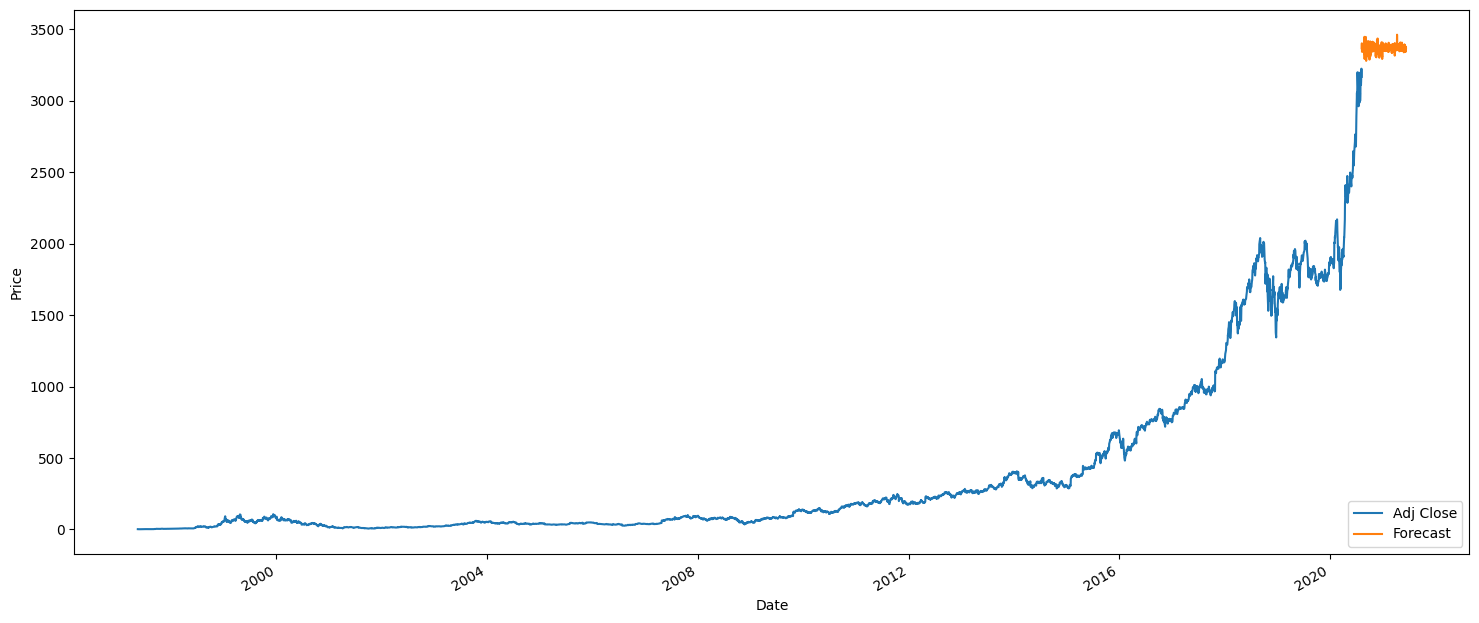

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Dari gambar di atas, garis berwarna oranye merupakan hasil peramalan (forecast) untuk harga penutupan saham 'Adj Close' pada dataset untuk kedepannya.

Jadi model random forest akan membaca data harga saham penutupan sebelumnya (garis berwarna biru), lalu membuat hasil prediksi atau forecast harga saham penutupan selanjutnya.

Terlihat data hasil peramalannya nilai sahamnya lebih tinggi tetapi polanya stasioner atau naik turun, serta tidak menunjukkan adanya trend seperti pada data sebelumnya.